# Projet Analyse de sentiments - Tweets du Pr√©sident de la R√©publique de 
# de la C√¥te d'Ivoire - Par Romuald KOUADIO (Data Analyst - AI Developer)

Lien github du projet: https://github.com/RomualdKouadio/Projet-Analyse-de-sentiments

In [1]:
!pip install textblob

In [2]:
!pip install tweepy

In [3]:
!pip install wordcloud

In [4]:
!pip install textblob-fr

In [5]:
# Importer les librairies 
import tweepy 
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
# Charger les donn√©es d'authentification Client de l'API Twitter depuis un fichier excel 
log = pd.read_excel("C:/Users/Romual/Desktop/Login.xlsx")

In [7]:
log.columns

Index(['key1', 'key2', 'key3', 'key4'], dtype='object')

In [8]:
# Twitter API Credentials
consumerKey = log.iloc[0,0]
consumerSecret = log.iloc[0,1]
accessToken = log.iloc[0,2]
accessTokenSecret = log.iloc[0,3]

In [9]:
# Cr√©er l'objet d'authentification
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Parametrer le access token et le access token secret
auth.set_access_token(accessToken, accessTokenSecret)

# Cr√©er l'objet API en transmettant les informations d'authentification
api = tweepy.API(auth, wait_on_rate_limit= True)

In [10]:
# Extraire 100 tweets de l'utilisateur Twitter
posts = api.user_timeline(screen_name= "AOuattara_PRCI", count= 100, tweet_mode="extended")

# Afficher les 5 derniers tweets du compte du PR Alassane Ouattara 
print("Afficher les 5 tweets r√©cents: \n")
i=1
for tweet in posts[0:5]:
    print(str(i) + ") "+ tweet.full_text + "\n")
    i= i+1

Afficher les 5 tweets r√©cents: 

1) C√©r√©monie d‚Äôouverture du Sommet des Chefs d‚ÄôEtat et de Gouvernement #COP15 sur la lutte contre la d√©sertification ce lundi 09 mai 2022 au Sofitel H√¥tel Ivoire √† Abidjan. https://t.co/Atfr0vQwtF

2) Face aux d√©fis de la #d√©sertification, nous devons agir vite. Je me r√©jouis de la mobilisation  pour le lancement de la #COP15 ainsi que le soutien √† ¬´ l‚ÄôInitiative d‚ÄôAbidjan ¬ª, qui vise √† restaurer nos  √©cosyst√®mes forestiers d√©grad√©s et √† promouvoir la gestion durable des sols. https://t.co/CiDPUaNmt7

3) A travers notre nouvelle Politique foresti√®re, nous faisons la promotion de l‚Äô#agroforesterie et faisons appel au secteur priv√© pour la reconstitution de notre couvert forestier. #COP15Abidan https://t.co/FtAs2OCq5Q

4) Je porte personnellement ¬´l‚Äôinitiative d‚ÄôAbidjan ¬ª, avec l‚Äôespoir qu‚Äôelle inspirera d'autres pays, en #Afrique et dans le reste du monde. #COP15Abidjan. https://t.co/VyNJakI40V

5) L‚Äôimpact des p

In [11]:
# Cr√©er un dataframe avec une colonne appel√©e Tweets dans lequel nous allons ajouter nos tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

# Afficher les 5 premi√®res lignes de donn√©es
df.head()

Tweets
0  C√©r√©monie d‚Äôouverture du Sommet des Chefs d‚ÄôEt...
1  Face aux d√©fis de la #d√©sertification, nous de...
2  A travers notre nouvelle Politique foresti√®re,...
3  Je porte personnellement ¬´l‚Äôinitiative d‚ÄôAbidj...
4  L‚Äôimpact des ph√©nom√®nes climatiques sur les te...

In [12]:
# Nettoyer le texte pour le pr√©parer √† l'analyse de sentiment

# Cr√©er une fonction pour nettoyer les tweets
def NettoyerTxt(texte):
    texte = re.sub(r'@[A-Za-z0-9]+', '', texte) # Supprimer les @mentions
    texte = re.sub(r'#', '', texte) # Supprimer les symboles '#'
    texte = re.sub(r'RT[\s]+', '', texte) # Supprimer RT
    texte = re.sub(r'https?:\/\/\S+', '', texte) # Supprimer les liens hyper textes
    
    return texte

# Nettoyage du texte
df['Tweets'] = df['Tweets'].apply(NettoyerTxt)

# Afficher le texte nettoy√©
df

Tweets
0   C√©r√©monie d‚Äôouverture du Sommet des Chefs d‚ÄôEt...
1   Face aux d√©fis de la d√©sertification, nous dev...
2   A travers notre nouvelle Politique foresti√®re,...
3   Je porte personnellement ¬´l‚Äôinitiative d‚ÄôAbidj...
4   L‚Äôimpact des ph√©nom√®nes climatiques sur les te...
..                                                ...
95  Retour √† Abidjan, ce mardi 22 f√©vrier 2022, ap...
96  De retour √† Abidjan apr√®s une mission √† Accra,...
97  Lors de nos √©changes avec la Pdte du Parlement...
98  Dans le cadre du SommetUEUA, j‚Äôai particip√© √† ...
99  Entretien avec Werner Hoyer, Pr√©sident de la B...

[100 rows x 1 columns]

In [13]:
# Enregistrer notre jeu de donn√©es 
df.to_csv('Tweets_Ado.csv')

In [14]:
# Cr√©er une fonction pour obtenir la subjectivit√©
def getSubjectivity(texte):
    return TextBlob(texte,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[1]

# Cr√©er une fonction pour obtenir la polarit√©
def getPolarity(texte):
    return TextBlob(texte,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0]

# Cr√©er deux nouvelles colonnes
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Afficher le nouveau dataframe avec les nouvelles colonnes ajout√©es 
df

Tweets  Subjectivity  Polarity
0   C√©r√©monie d‚Äôouverture du Sommet des Chefs d‚ÄôEt...      0.000000  0.000000
1   Face aux d√©fis de la d√©sertification, nous dev...      0.000000  0.000000
2   A travers notre nouvelle Politique foresti√®re,...      0.216667  0.033333
3   Je porte personnellement ¬´l‚Äôinitiative d‚ÄôAbidj...      0.000000 -0.100000
4   L‚Äôimpact des ph√©nom√®nes climatiques sur les te...      0.000000  0.000000
..                                                ...           ...       ...
95  Retour √† Abidjan, ce mardi 22 f√©vrier 2022, ap...      0.000000  0.000000
96  De retour √† Abidjan apr√®s une mission √† Accra,...      1.000000  1.000000
97  Lors de nos √©changes avec la Pdte du Parlement...      0.000000  0.000000
98  Dans le cadre du SommetUEUA, j‚Äôai particip√© √† ...      0.150000 -0.135000
99  Entretien avec Werner Hoyer, Pr√©sident de la B...      0.000000  0.000000

[100 rows x 3 columns]

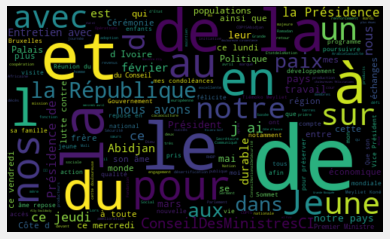

<Figure size 432x288 with 0 Axes>

In [15]:
# Tracer le nuage de mots 'word cloud'
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()
plt.savefig(fname='nuage_de_mots')

In [16]:
# Cr√©er une fonction pour calculer l'analyse n√©gative, neutre et positive
def getAnalysis(score):
    if score < 0:
        return 'Negatif'
    elif score == 0:
        return 'Neutre'
    else:
        return 'Positif'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Afficher le dataframe
df

Tweets  Subjectivity  Polarity  \
0   C√©r√©monie d‚Äôouverture du Sommet des Chefs d‚ÄôEt...      0.000000  0.000000   
1   Face aux d√©fis de la d√©sertification, nous dev...      0.000000  0.000000   
2   A travers notre nouvelle Politique foresti√®re,...      0.216667  0.033333   
3   Je porte personnellement ¬´l‚Äôinitiative d‚ÄôAbidj...      0.000000 -0.100000   
4   L‚Äôimpact des ph√©nom√®nes climatiques sur les te...      0.000000  0.000000   
..                                                ...           ...       ...   
95  Retour √† Abidjan, ce mardi 22 f√©vrier 2022, ap...      0.000000  0.000000   
96  De retour √† Abidjan apr√®s une mission √† Accra,...      1.000000  1.000000   
97  Lors de nos √©changes avec la Pdte du Parlement...      0.000000  0.000000   
98  Dans le cadre du SommetUEUA, j‚Äôai particip√© √† ...      0.150000 -0.135000   
99  Entretien avec Werner Hoyer, Pr√©sident de la B...      0.000000  0.000000   

   Analysis  
0    Neutre  
1    Neutre  
2   Positif  
3   Negatif  
4    Neutre  
..      ...  
95   Neutre  
96  Positif  
97   Neutre  
98  Negatif  
99   Neutre  

[100 rows x 4 columns]

In [17]:
# Afficher tous les tweets positifs du PR
l = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positif'):
        print(str(l) + ') ' + sortedDF['Tweets'][i])
        print()
        l = l+1

1) A travers notre nouvelle Politique foresti√®re, nous faisons la promotion de l‚Äôagroforesterie et faisons appel au secteur priv√© pour la reconstitution de notre couvert forestier. COP15Abidan 

2) Agissons vite, agissons ensemble pour donner une nouvelle vie √† nos terres ! COP15Abidjan 

3) La Cote d‚ÄôIvoire est fi√®re d‚Äôaccueillir la COP15 contre la d√©sertification du 9 mai au 20 mai √† Abidjan. 

Avec les leaders du monde entier et de l‚Äô, nous prendrons des engagements forts  pour pr√©server &amp; restaurer nos terres.

Ensemble √† AbidjanCOP15 ! 

4) La C√¥te d‚ÄôIvoire perd un valeureux fils, un homme de conviction et de devoir. Je perds un fid√®le compagnon, un ami loyal et d√©vou√©. 

En cette douloureuse circonstance, je pr√©sente mes  condol√©ances les plus √©mues √† sa famille et √† ses proches. 

Que son √¢me repose en paix.

5) Mes chers compatriotes, 
J‚Äôai la profonde douleur de vous annoncer le d√©c√®s, ce samedi 7 mai 2022, du Pr√©sident de l‚ÄôAssembl√©e Na

In [18]:
# Afficher tous les tweets neutres du PR
l = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Neutre'):
        print(str(l) + ') ' + sortedDF['Tweets'][i])
        print()
        l = l+1

1) C√©r√©monie d‚Äôouverture du Sommet des Chefs d‚ÄôEtat et de Gouvernement COP15 sur la lutte contre la d√©sertification ce lundi 09 mai 2022 au Sofitel H√¥tel Ivoire √† Abidjan. 

2) Face aux d√©fis de la d√©sertification, nous devons agir vite. Je me r√©jouis de la mobilisation  pour le lancement de la COP15 ainsi que le soutien √† ¬´ l‚ÄôInitiative d‚ÄôAbidjan ¬ª, qui vise √† restaurer nos  √©cosyst√®mes forestiers d√©grad√©s et √† promouvoir la gestion durable des sols. 

3) L‚Äôimpact des ph√©nom√®nes climatiques sur les terres se pose avec acuit√© en C√¥te d‚ÄôIvoire. COP15Abidjan 

4) Entretien avec Son √âminence le Cardinal Pietro Parolin, Secr√©taire d'Etat du Saint-Si√®ge, ce vendredi 06 mai 2022 au Palais de la Pr√©sidence de la R√©publique. 

5) Entretien avec _adesina, Pr√©sident de la BAD, ce jeudi 05 mai 2022 au Palais de la Pr√©sidence de la R√©publique 

6) La journ√©e mondiale du Patrimoine africain, nous offre l‚Äôoccasion de mettre en lumi√®re nos 5 sites embl√©ma

In [19]:
# Afficher tous les tweets negatifs du PR
l = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negatif'):
        print(str(l) + ') ' + sortedDF['Tweets'][i])
        print()
        l = l+1

1) Je porte personnellement ¬´l‚Äôinitiative d‚ÄôAbidjan ¬ª, avec l‚Äôespoir qu‚Äôelle inspirera d'autres pays, en Afrique et dans le reste du monde. COP15Abidjan. 

2) : Entre 2015 et 2020, l‚Äôacc√®s √† l‚Äôeau potable est pass√© de 65% √† 82% sur l‚Äô√©tendue du territoire national. Le PSGouv permet‚Ä¶

3) C√©r√©monie Solennelle de Prestation de Serment du Vice-Pr√©sident de la R√©publique, ce mercredi 20 avril 2022 PrestationdeSermentVP 

4) Suivez, en direct du Palais de la Pr√©sidence de la R√©publique, la C√©r√©monie Solennelle de Prestation de Serment du Vice-pr√©sident, ce mercredi 20 avril 2022



5) Je me f√©licite de l‚Äôadoption, le 30 mars dernier, en ConseilDesMinistresCI, de la Politique et de la Strat√©gie nationale pour une cacaoculture durable bas√©e sur l‚Äôam√©lioration des revenus de nos producteurs, la lutte contre la d√©forestation et le travail des enfants.

6) Le mois de mars a √©t√© marqu√© par le renforcement de nos relations diplomatiques, la diversificatio

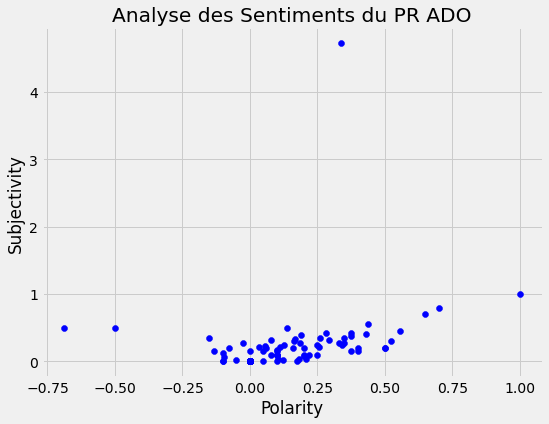

<Figure size 432x288 with 0 Axes>

In [20]:
# Tracer la polarit√© et la subjectivit√©
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
    
plt.title('Analyse des Sentiments du PR ADO')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
plt.savefig('Visualisation_Polarit√©_Subjectivit√©')

In [21]:
# Obtenir le pourcentage de tweets positifs
tweets_positifs = df[df.Analysis == 'Positif']
tweets_positifs = tweets_positifs['Tweets']

round( (tweets_positifs.shape[0] / df.shape[0]) * 100, 1)

55.0

In [22]:
# Obtenir le pourcentage de tweets neutres 
tweets_neutres = df[df.Analysis == 'Neutre']
tweets_neutres = tweets_neutres['Tweets']

round( (tweets_neutres.shape[0] / df.shape[0]) * 100, 1)

34.0

In [23]:
# Obtenir le pourcentage de tweets n√©gatifs
tweets_negatifs = df[df.Analysis == 'Negatif']
tweets_negatifs = tweets_negatifs['Tweets']

round( (tweets_negatifs.shape[0] / df.shape[0]) * 100, 1)

11.0

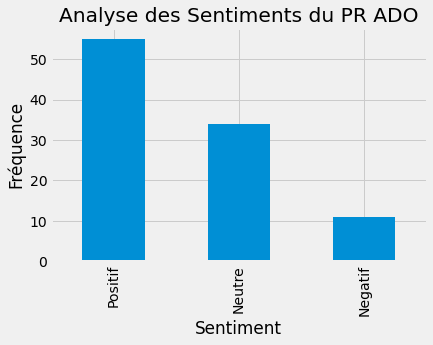

<Figure size 432x288 with 0 Axes>

In [24]:
# Afficher les fr√©quences 

df['Analysis'].value_counts()

# Tracer et visualiser les fr√©quences de tweets par sentiment
plt.title('Analyse des Sentiments du PR ADO')
plt.xlabel('Sentiment')
plt.ylabel('Fr√©quence')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()
plt.savefig('Resultats_Analyse')

In [25]:
# Sauvegarde des r√©sultats
df.to_csv('PrAdo_Sentiment_Analysis.csv')